In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import fashion_mnist
from keras import losses
from keras import metrics

In [48]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

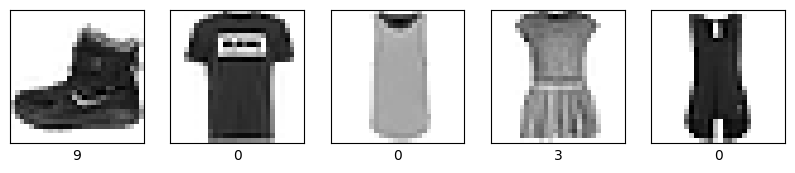

In [51]:
def show_images(images, labels, predictions=None, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if predictions is not None:
            predicted_label = np.argmax(predictions[i])
            true_label = labels[i]
            color = 'blue' if predicted_label == true_label else 'red'
            plt.xlabel(f'{predicted_label} ({true_label})', color=color)
        else:
            plt.xlabel(labels[i])
    plt.show()

# Вибираємо перші 5 зображень з навчального датасету для відображення
show_images(train_images[:5], train_labels[:5])


In [52]:
# Масштабування значень пікселів до діапазону від 0 до 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# # Преобразування цільових міток до формату one-hot encoding
# train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
# test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Преобразування цільових міток до формату цілих чисел (без one-hot encoding)
train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [53]:
# Створення моделі
model = tf.keras.models.Sequential()

# Додавання першого шару: вхідний шар
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# Додавання прихованого шару з функцією активації
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) # Dropout для регуляризації

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))  # Dropout для регуляризації

# Додавання вихідного шару з функцією активації softmax для класифікації
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [54]:
# Компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# Виведення інформації про модель
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118

In [58]:
# Тренування моделі
history = model.fit(train_images, train_labels, epochs=20, batch_size=512, validation_data=(test_images, test_labels), shuffle=True)

Epoch 1/20
118/118 [==============================] - 2s 16ms/step - loss: 0.3203 - accuracy: 0.8825 - val_loss: 0.3274 - val_accuracy: 0.8833
Epoch 2/20
118/118 [==============================] - 2s 13ms/step - loss: 0.3077 - accuracy: 0.8865 - val_loss: 0.3262 - val_accuracy: 0.8849
Epoch 3/20
118/118 [==============================] - 2s 19ms/step - loss: 0.3059 - accuracy: 0.8867 - val_loss: 0.3264 - val_accuracy: 0.8841
Epoch 4/20
118/118 [==============================] - 3s 23ms/step - loss: 0.3026 - accuracy: 0.8862 - val_loss: 0.3242 - val_accuracy: 0.8834
Epoch 5/20
118/118 [==============================] - 2s 16ms/step - loss: 0.3001 - accuracy: 0.8893 - val_loss: 0.3264 - val_accuracy: 0.8838
Epoch 6/20
118/118 [==============================] - 2s 15ms/step - loss: 0.3003 - accuracy: 0.8885 - val_loss: 0.3235 - val_accuracy: 0.8851
Epoch 7/20
118/118 [==============================] - 2s 15ms/step - loss: 0.3004 - accuracy: 0.8881 - val_loss: 0.3278 - val_accuracy: 0.8850

In [59]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8857
Test accuracy: 0.885699987411499


In [60]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


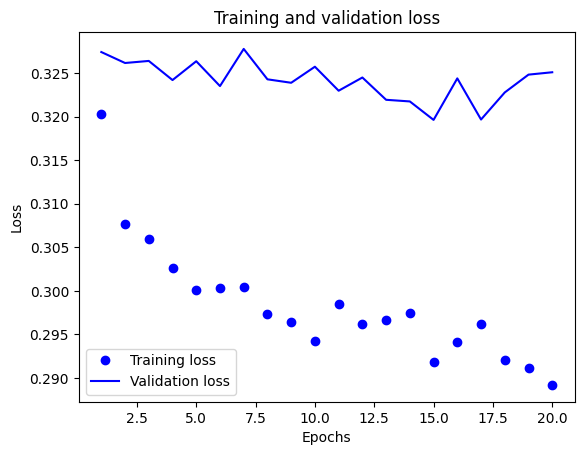

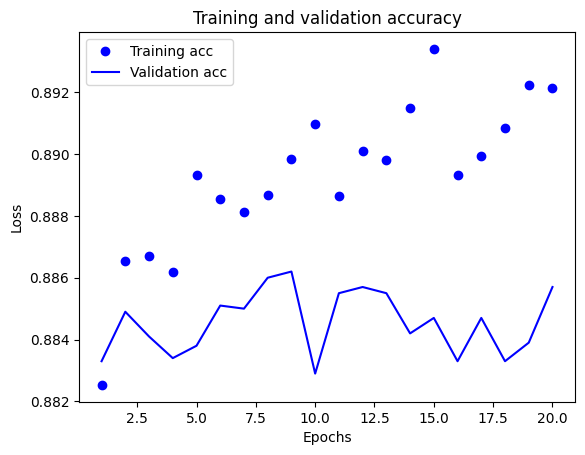

In [61]:
# Виведення графіків точності та втрат від кількості епох

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
